In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [4]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


<Axes: xlabel='Drug', ylabel='count'>

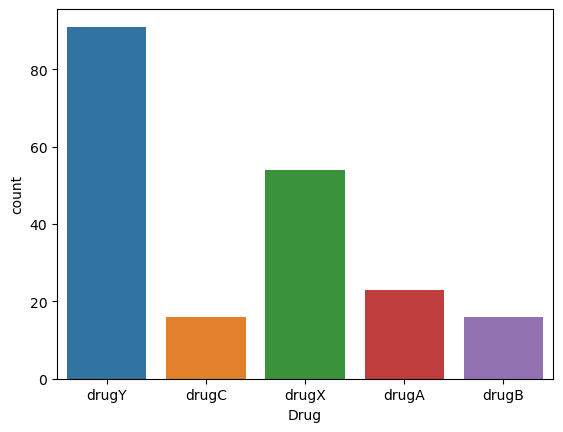

In [5]:
print(df.Drug.value_counts())
sns.countplot(x='Drug', data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
def plot_histplot(column, ax=None):
    sns.histplot(x=column, color='#65b87b', alpha=.7, ax=ax)
    
def plot_countplot(column, ax=None):
    with sns.axes_style('ticks'):
        sns.countplot(x=column, palette=sns.color_palette('rocket'), ax=ax)
        sns.despine(offset=6)
        
def plot_barplot(x, y, ax=None):
    sns.barplot(x=x, y=y, palette=sns.color_palette('rocket'))
    
def plot_boxplot(x, y, ax=None):
    sns.boxplot(x=x, y=y)

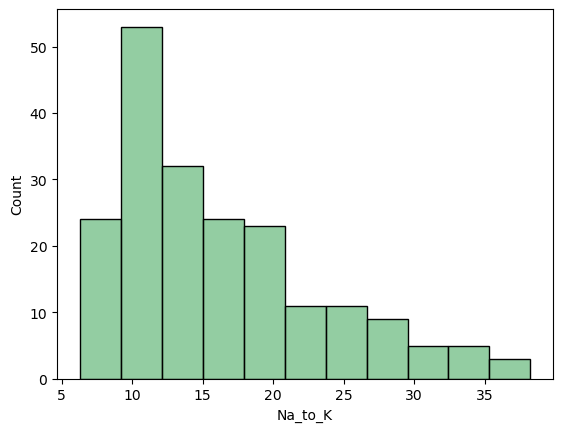

In [9]:
plot_histplot(df.Na_to_K)

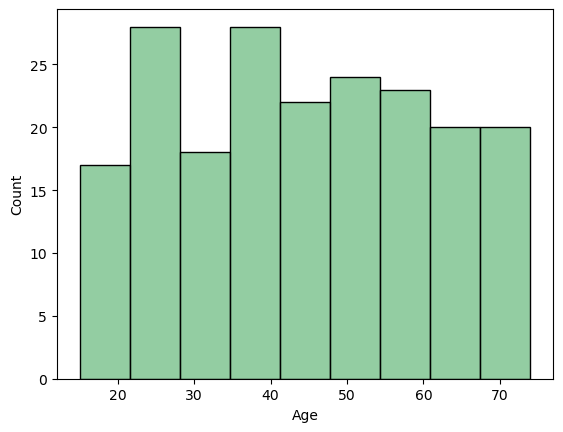

In [10]:
plot_histplot(df.Age)

Text(0.5, 1.0, 'Female - BP')

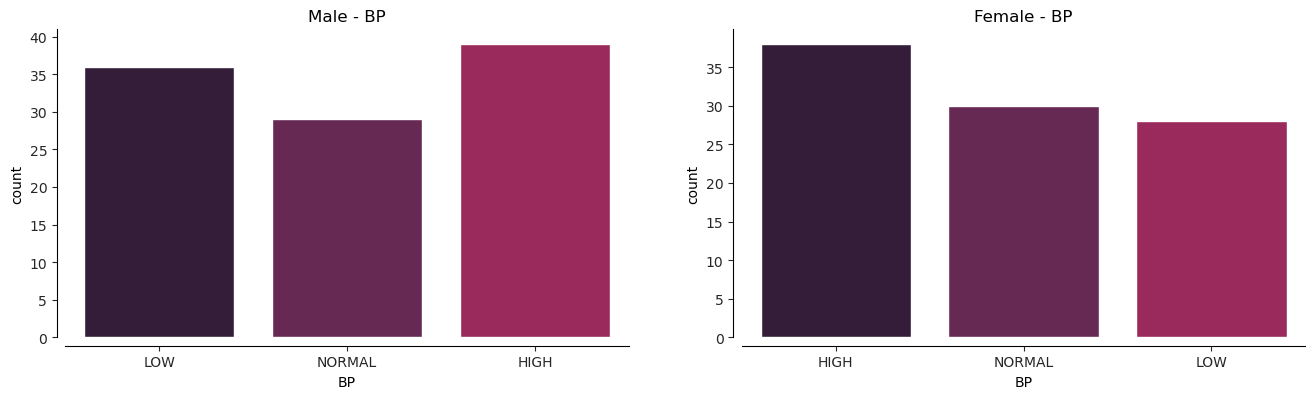

In [11]:
f, ax = plt.subplots(1, 2, figsize=(16, 4))

plot_countplot(df[df.Sex == 'M'].BP, ax=ax[0])
plot_countplot(df[df.Sex == 'F'].BP, ax=ax[1])

ax[0].set_title('Male - BP')
ax[1].set_title('Female - BP')

Text(0.5, 1.0, 'Female - Cholesterol')

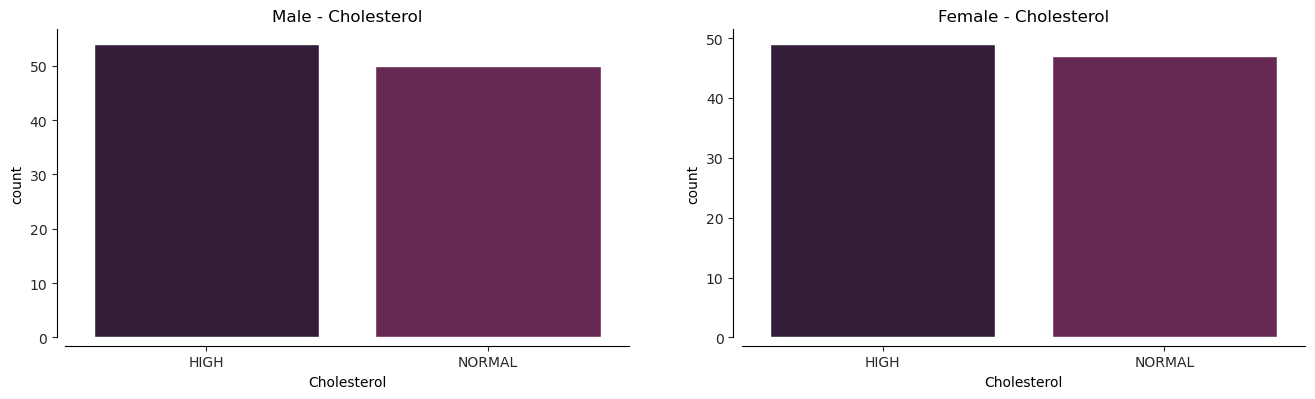

In [12]:
f, ax = plt.subplots(1, 2, figsize=(16, 4))

plot_countplot(df[df.Sex == 'M'].Cholesterol, ax=ax[0])
plot_countplot(df[df.Sex == 'F'].Cholesterol, ax=ax[1])

ax[0].set_title('Male - Cholesterol')
ax[1].set_title('Female - Cholesterol')

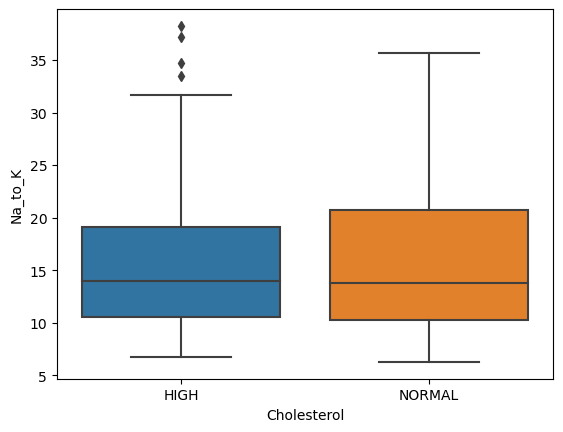

In [13]:
plot_boxplot(df.Cholesterol, df.Na_to_K)

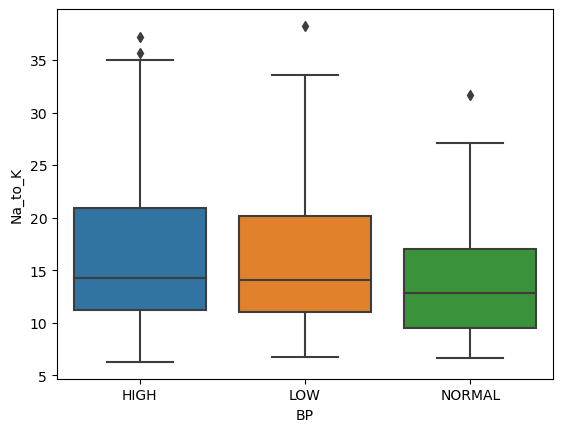

In [14]:
plot_boxplot(df.BP, y=df.Na_to_K)

In [15]:
def data_encoding(df):
    df.Sex = LabelEncoder().fit_transform(df.Sex)
    df.BP = LabelEncoder().fit_transform(df.BP)
    df.Cholesterol = LabelEncoder().fit_transform(df.Cholesterol)

In [16]:
data_encoding(df)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [17]:
df.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [18]:
df['Drug'] = df['Drug'].map({'drugA':0, 'drugB':1,'drugC':2,'drugX':3,'drugY':4})

In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [20]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df.Drug.values

In [21]:
x = StandardScaler().fit_transform(x)
print(f'Dataset size: {len(x)}')

Dataset size: 200


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
x=df.drop("Drug", axis=1)
y= df["Drug"]

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [75]:
print(f'Training set size: {len(x_train)}')
print(f'Test set size: {len(x_test)}')

Training set size: 160
Test set size: 40


In [76]:
scale = StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [77]:
log=DecisionTreeClassifier()

In [78]:
log.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred =log.predict(x_test)

In [80]:
print(f"Training Score : {log.score(x_train,y_train)}")
print(f"Testing Score : {log.score(x_test,y_test)}")

Training Score : 1.0
Testing Score : 1.0


In [81]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [82]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("", metrics.classification_report(y_test,y_pred))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [83]:
cnfTrain1=print("", metrics.confusion_matrix(y_test,y_pred))
cnfTrain1

 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


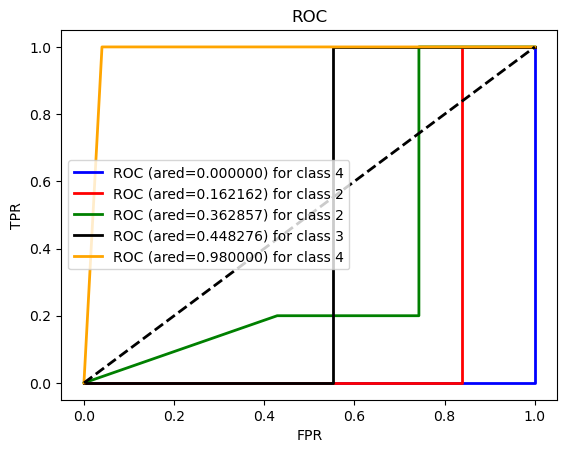

In [84]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#roc curve
yb=label_binarize(y,classes=[0,1,2,3,4])
nc=yb.shape[1]
classifier1= OneVsRestClassifier(log)
y_score=classifier1.fit(x_train,y_train).predict(x_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(nc):
    fpr[i],tpr[i],_=roc_curve(y_test ==i,y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()

color=['blue','red','green','black','orange']
for i,color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color,lw=2,label='ROC (ared={:2f}) for class {}'.format(roc_auc[i],df['Drug'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(log, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train),grid_search.best_estimator_,grid_search.best_score_

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [3, None], 'max_features': [1, 3, 10],
                          'min_samples_split': [2, 3, 10]}),
 DecisionTreeClassifier(max_features=10),
 0.9923076923076923)

In [119]:
model = DecisionTreeClassifier(max_features=3, min_samples_split=10).fit(x_train, y_train)

In [120]:
val_score = cross_val_score(model,x_train,y_train,cv = 5)
print(f'minimum score of model on train data : {val_score.min()}')
print(f'best score of model on train data : {val_score.mean()}')
print(f'maximum score of model on train data : {val_score.max()}')

minimum score of model on train data : 0.8888888888888888
best score of model on train data : 0.9552706552706554
maximum score of model on train data : 1.0


In [121]:
pred = model.predict(x_test)

In [122]:
print(f'model accuracy  {accuracy_score(y_test,pred)}')

model accuracy  0.9696969696969697


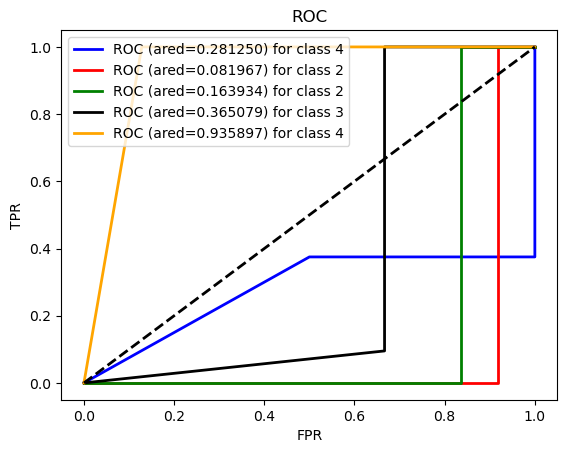

In [123]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#roc curve
yb=label_binarize(y,classes=[0,1,2,3,4])
nc=yb.shape[1]
classifier2= OneVsRestClassifier(model)
y_score=classifier2.fit(x_train,y_train).predict(x_test)
fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(nc):
    fpr[i],tpr[i],_=roc_curve(y_test ==i,y_score)
    roc_auc[i]=auc(fpr[i],tpr[i])
plt.figure()

color=['blue','red','green','black','orange']
for i,color in zip(range(nc),color):
    plt.plot(fpr[i],tpr[i],color=color,lw=2,label='ROC (ared={:2f}) for class {}'.format(roc_auc[i],df['Drug'][i]))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()